# White Wine Regression analysis

- linear regression; finding relationship between two variables


In [1]:
pip install lightgbm


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


## Looking at given dataset

In [8]:
df = pd.read_csv('winequality-white.csv', sep =';')
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
colnames= list(df.columns)
colnames

for s in colnames:
    q1= df[s].quantile(0.25)
    q3= df[s].quantile(0.75)
    iqr= q3 - q1
    ot= (q1 -1.5*iqr, q3+1.5*iqr)
    outliers= df[(df[s]<ot[0])| (df[s]> ot[1])]
    n_outliers = len(outliers)
    
    print(f'{s} outlier thresholds:{round(ot[0],2),round(ot[1],2)}', f'No. of outliers: {n_outliers}')



fixed acidity outlier thresholds:(4.8, 8.8) No. of outliers: 119
volatile acidity outlier thresholds:(0.04, 0.49) No. of outliers: 186
citric acid outlier thresholds:(0.09, 0.57) No. of outliers: 270
residual sugar outlier thresholds:(-10.6, 22.2) No. of outliers: 7
chlorides outlier thresholds:(0.01, 0.07) No. of outliers: 208
free sulfur dioxide outlier thresholds:(-11.5, 80.5) No. of outliers: 50
total sulfur dioxide outlier thresholds:(19.5, 255.5) No. of outliers: 19
density outlier thresholds:(0.99, 1.0) No. of outliers: 5
pH outlier thresholds:(2.8, 3.56) No. of outliers: 75
sulphates outlier thresholds:(0.2, 0.76) No. of outliers: 124
alcohol outlier thresholds:(6.65, 14.25) No. of outliers: 0
quality outlier thresholds:(3.5, 7.5) No. of outliers: 200


## Univariate Analysis

<Axes: >

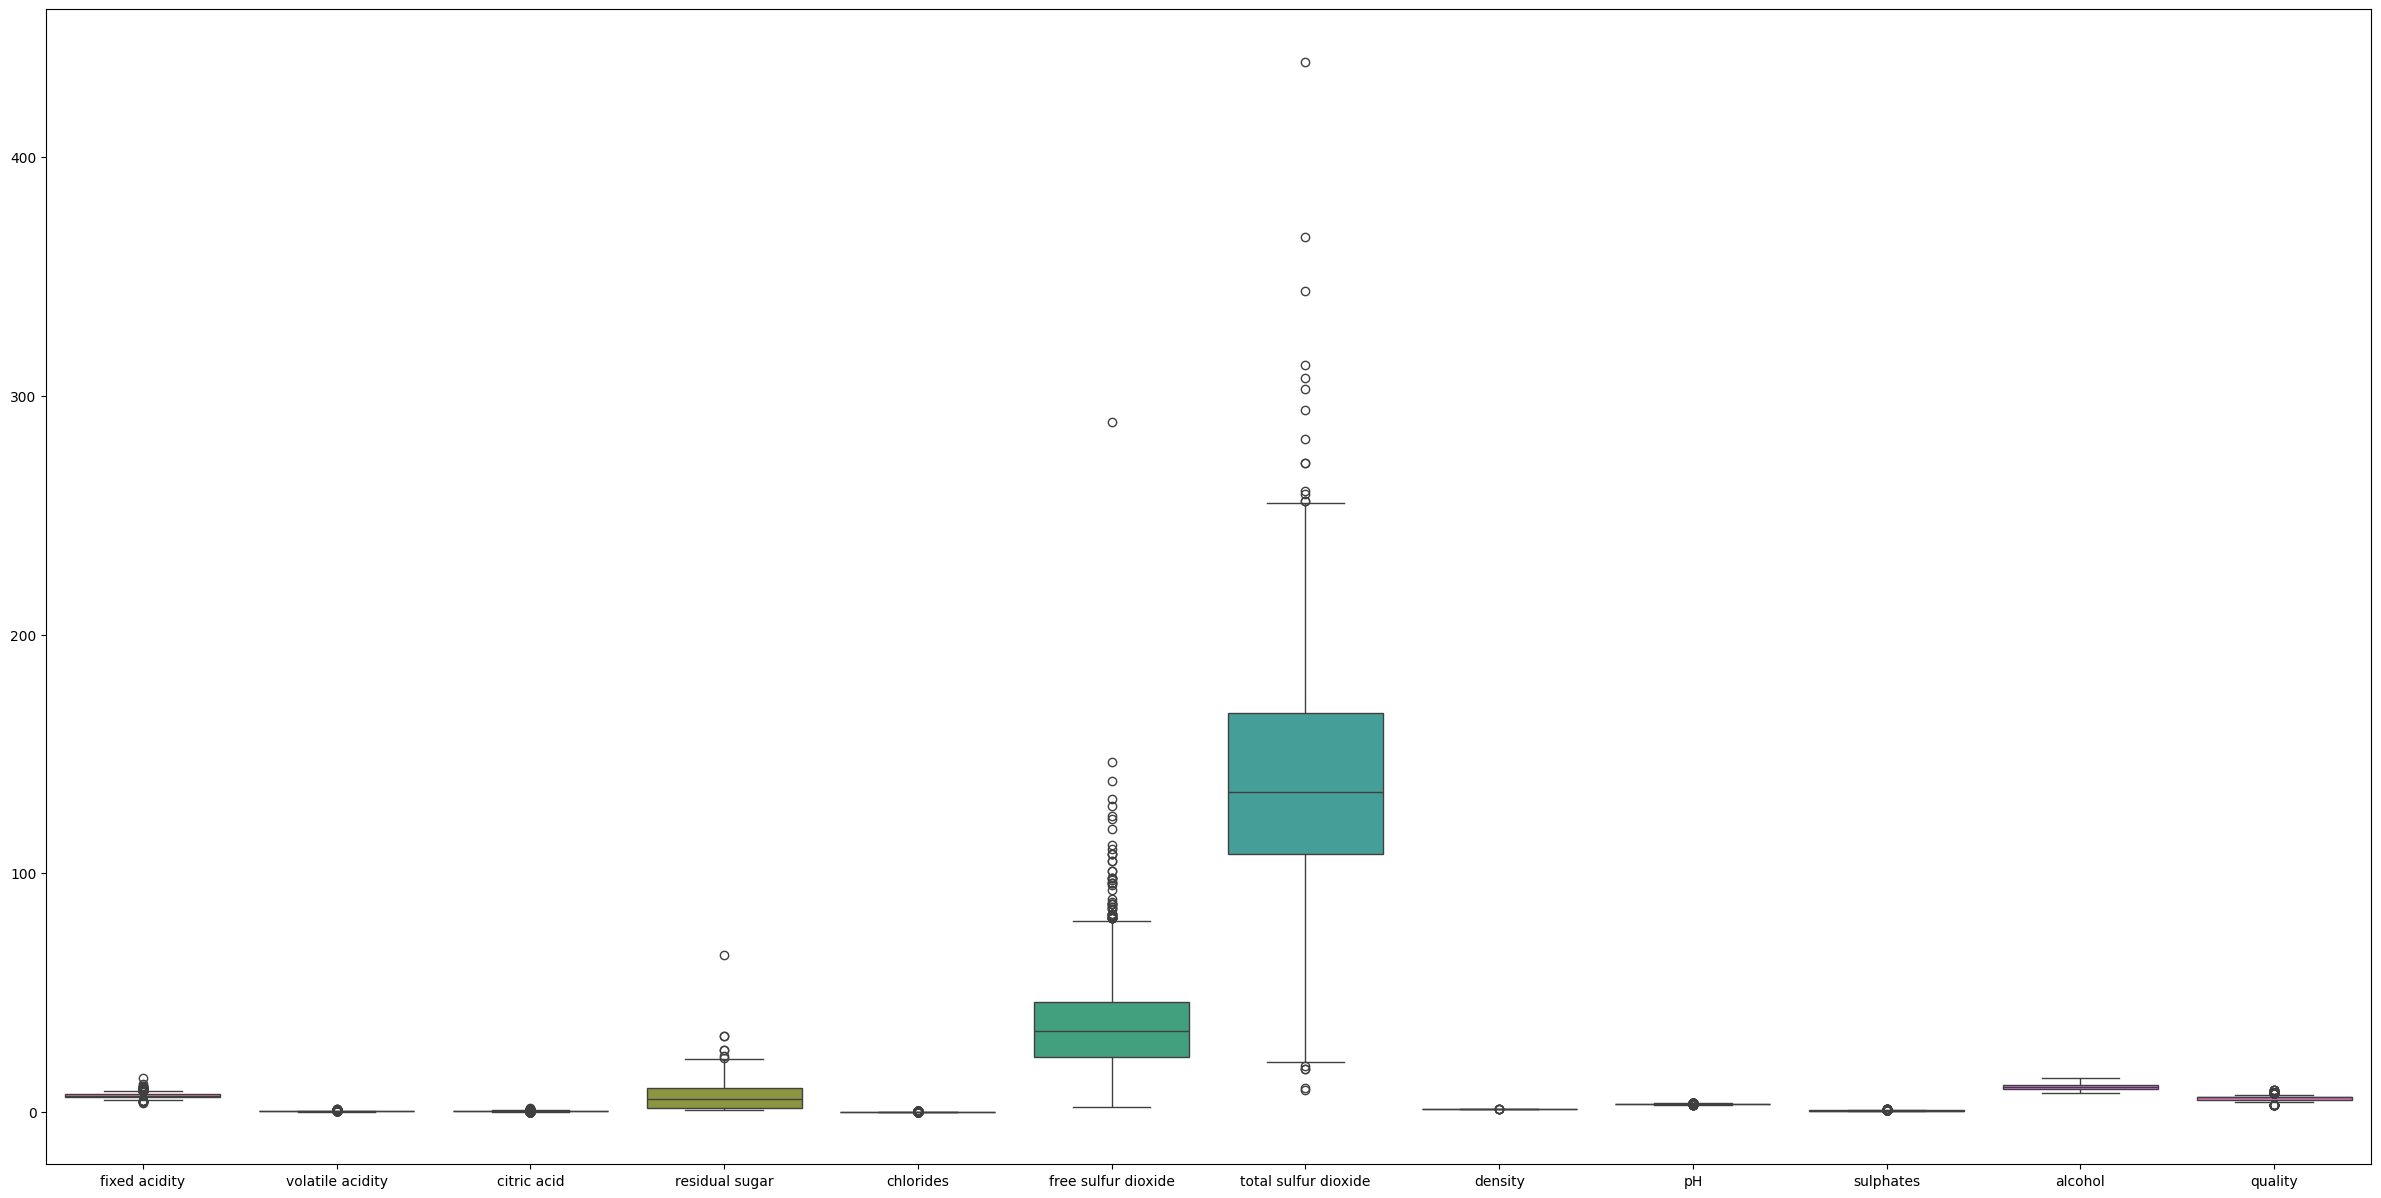

In [13]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df)

<Axes: >

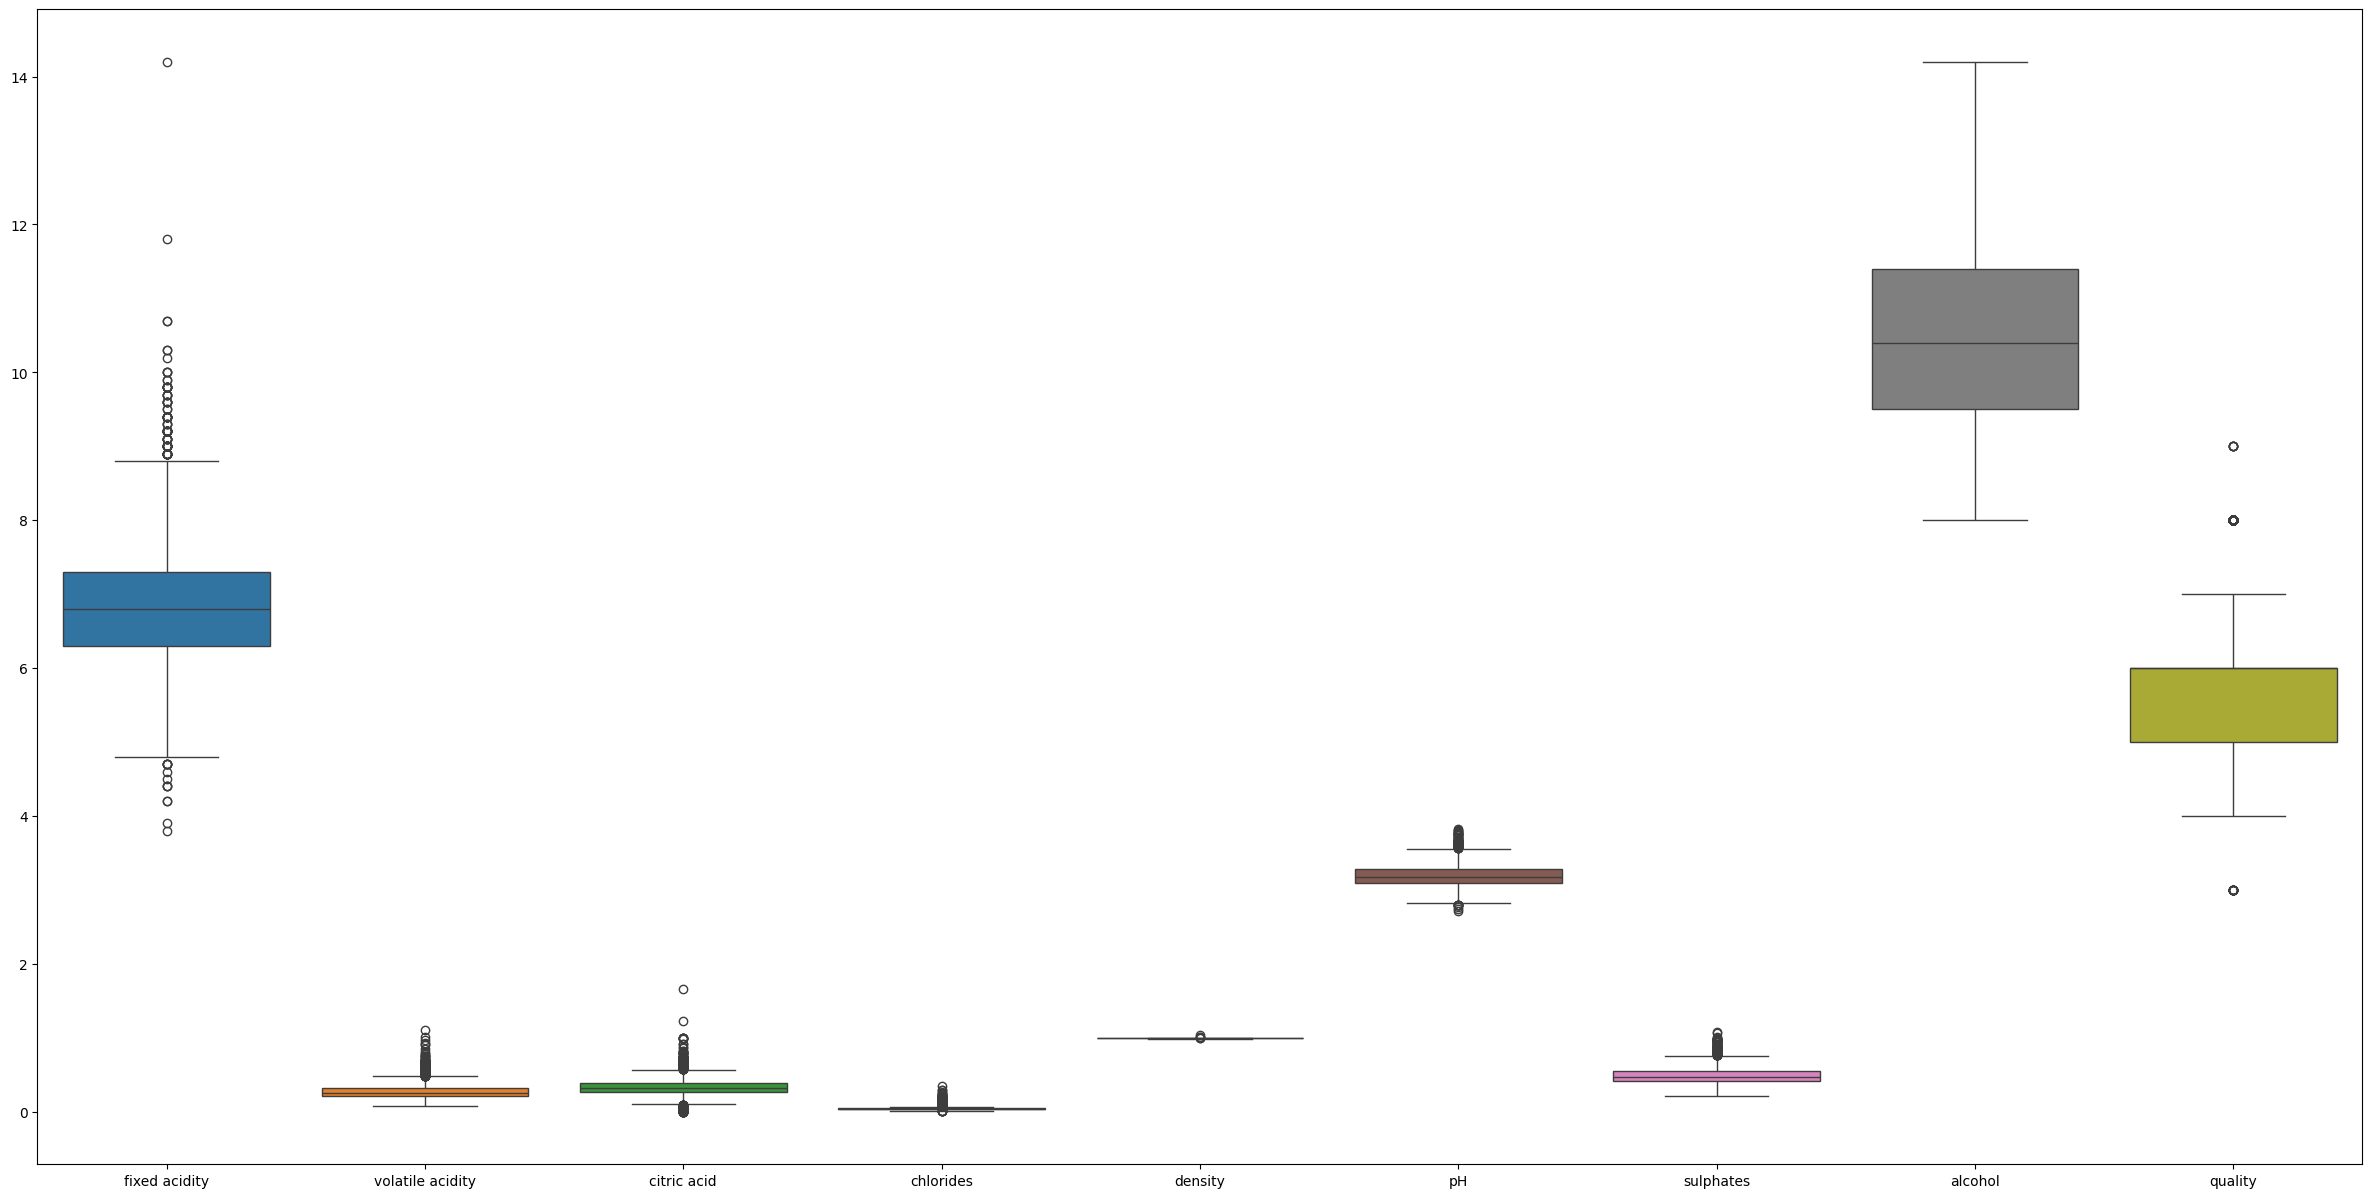

In [14]:
plt.figure(figsize=(30,15))
zoom = df.drop(['total sulfur dioxide', 'free sulfur dioxide','residual sugar'], axis=1)
sns.boxplot(data= zoom)

## Multivariate Analysis

<Axes: >

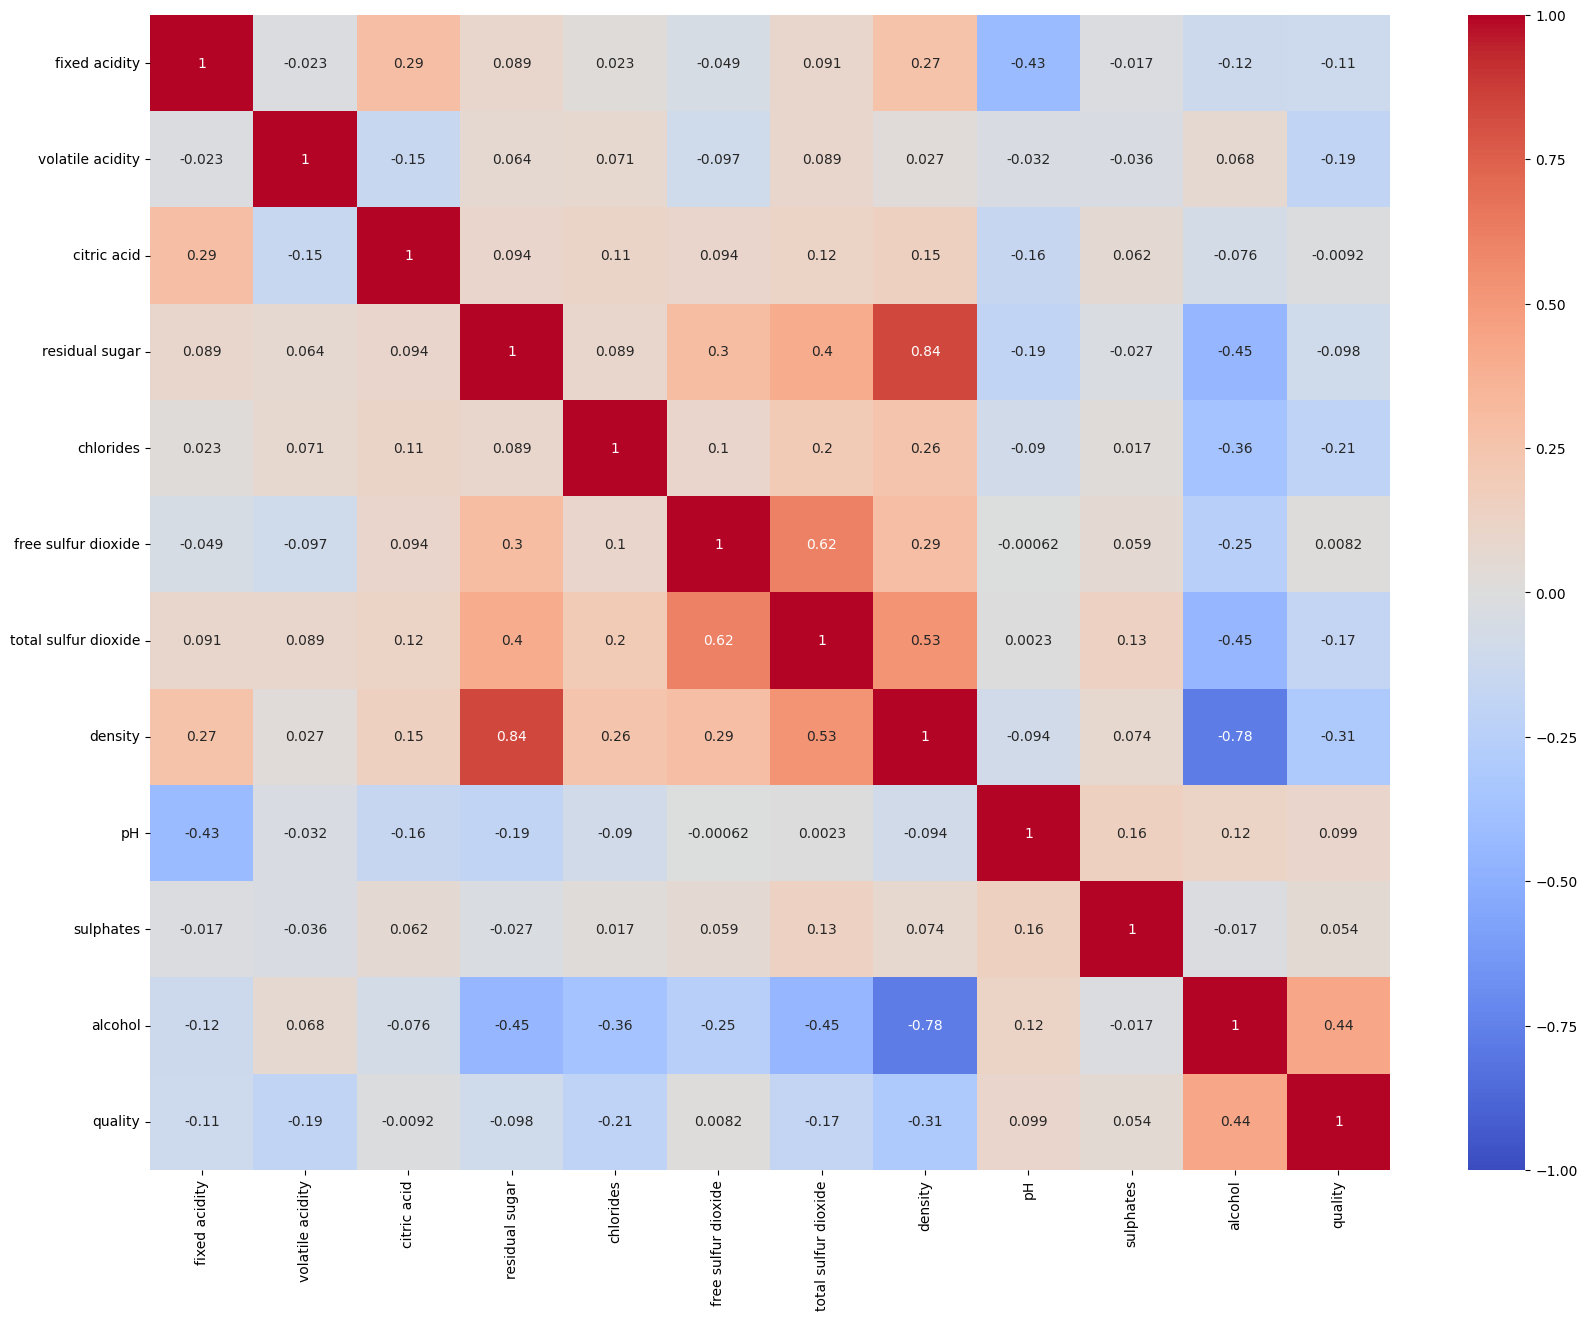

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap= 'coolwarm', annot= True)

<Axes: xlabel='quality', ylabel='count'>

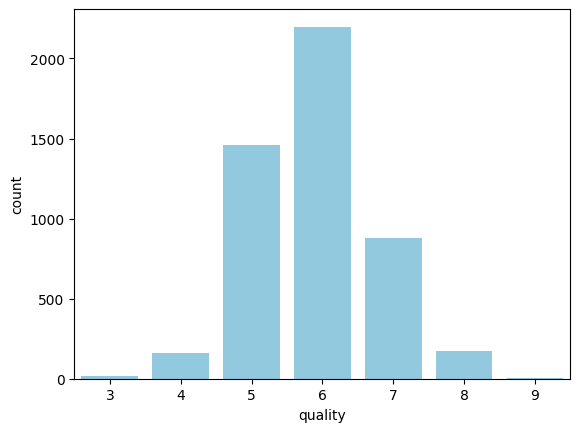

In [16]:
color= 'skyblue'
sns.countplot(data= df, x= 'quality', color=color)

>**Note**
It was observed that wine quality is onl in ranges 3~9 while being concentrated at 5~7. 
Since data is imbalanced through the classes, class balancing may need to be performed

## Machine Learning


In [17]:
df.columns= ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH','sulphates','alcohol','quality']
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
#splitting the dataset before balancing the class
X= df.drop(columns= ['quality'])
y= df['quality']

In [19]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## Oversampling
Using smote to balance the class ratio

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)
y.value_counts()

6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.25, random_state= 43)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test)*100)

    score= cross_val_score(model, X, y, cv = 5)
    print('CV Score:', np.mean(score)*100)

## Training data with different models

**Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
classify(model, X, y)

Accuracy: 48.609305952690406
CV Score: 46.78291408536749


**Random Forest**

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 80.47829477514948
CV Score: 76.8556962164315


**Extra Trees**

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 89.65427605926696
CV Score: 85.64935762895726


**XGBoost**

In [25]:
import xgboost as xgb
model = xgb.XGBClassifier()
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.25, random_state= 43)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yy_train = le.fit_transform(y_train)
yy_test= le.fit_transform(y_test)
yy= le.fit_transform(y)
model.fit(x_train, yy_train)

print('Accuracy:', model.score(x_test, yy_test)*100)
score= cross_val_score(model, X, yy, cv = 5)
print('CV Score:', np.mean(score)*100)


Accuracy: 88.66649337145827
CV Score: 84.05717407422189


**LightGBM**

In [26]:
import lightgbm 
model = lightgbm.LGBMClassifier()
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.25, random_state= 43)

model.fit(x_train, y_train)
print('Accuracy:', model.score(x_test, y_test)*100)
score= cross_val_score(model, X, y, cv = 5)
print('CV Score:', np.mean(score)*100)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 11539, number of used features: 11
[LightGBM] [Info] Start training from score -1.938915
[LightGBM] [Info] Start training from score -1.959610
[LightGBM] [Info] Start training from score -1.938313
[LightGBM] [Info] Start training from score -1.955926
[LightGBM] [Info] Start training from score -1.947992
[LightGBM] [Info] Start training from score -1.923967
[LightGBM] [Info] Start training from score -1.957153
Accuracy: 88.25058487132831
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in th